# Gastrointestinal Tract Classification (8 Classes)

## Download and extract the Dataset

In [ ]:
!mkdir kvasir
!wget --no-check-certificate 'https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/ERzdk7nD_aBEgnA0NS-DlzwBjM2v0jo8iH-laBgi1YOkEg?e=JMgQXd&download=1' -O kvasir-dataset-v2.zip
!unzip /content/kvasir-dataset-v2.zip
!mv /content/content/kvasir/kvasir-dataset-v2 /content/kvasir
!rm -r /content/content

Streaming output truncated to the last 5000 lines.
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/3b77b2f5-5a77-47b9-9475-477c26ec78d7.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/195f99c7-bd05-4189-86f3-89480d1d3913.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/1b03c9ad-70b6-484f-b342-8614d5062e34.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/140670b4-221e-4149-b748-f29940067147.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/13a62adb-0941-4df7-b788-aa733e244f4f.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/760dfee6-3715-456b-ad6b-48b17db59fdd.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/4128a5ff-df5d-4b3a-9560-bd131a13526a.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/a1e1c7f8-a30f-4b4f-9d62-3d356a864229.jpg  
  inflating: content/kvasir/kvasir-dataset-v2/dyed-lifted-polyps/b5e24486-2569-4192-9

## Verify data directories

In [ ]:
!ls kvasir/kvasir-dataset-v2

dyed-lifted-polyps	esophagitis   normal-pylorus  polyps
dyed-resection-margins	normal-cecum  normal-z-line   ulcerative-colitis


In [ ]:
#import libraries

import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D

In [ ]:
#dataset path

dataset_directory = "/content/kvasir/kvasir-dataset-v2"

## Creating Random Train and Validation Splits

In [ ]:
# train-test-splits
training_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                               labels="inferred",
                                                               image_size=(299, 299),
                                                               batch_size=16,
                                                               subset="training",
                                                               validation_split=0.222222,
                                                               seed=123
                                                               )

validation_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                              labels="inferred",
                                                              image_size=(299, 299),
                                                              batch_size=16,
                                                              subset="validation",
                                                              validation_split=0.222222,
                                                              seed=123
                                                              )

Found 7200 files belonging to 8 classes.
Using 5601 files for training.
Found 7200 files belonging to 8 classes.
Using 1599 files for validation.


In [ ]:
#classes labels

print(len(training_data.class_names), "Classes are:", training_data.class_names)

8 Classes are: ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']


## Visualization

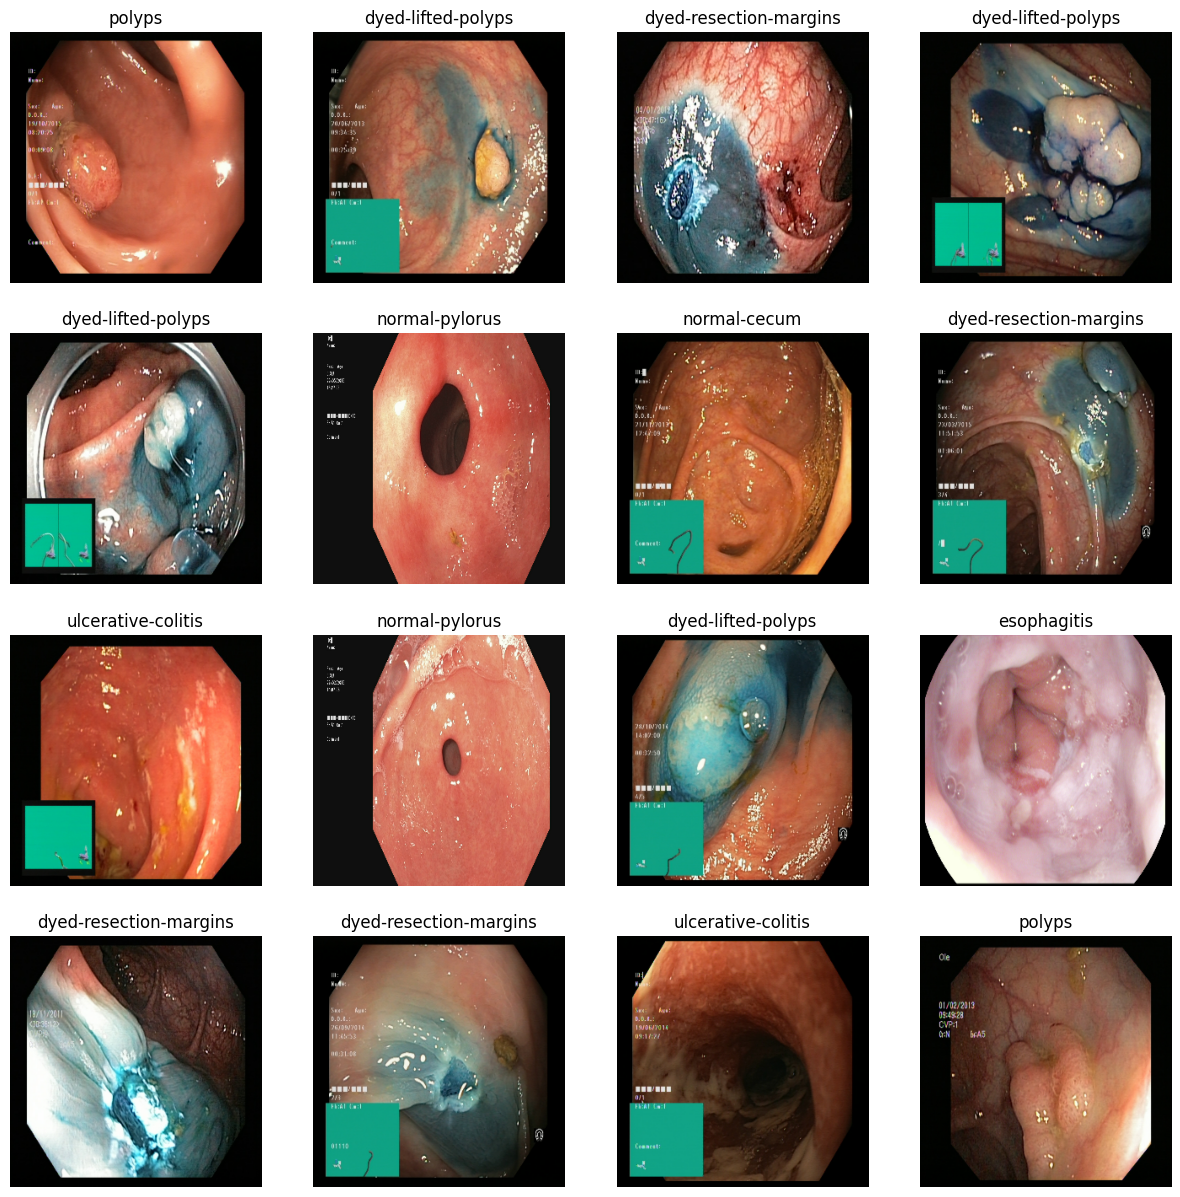

In [ ]:
#image plot

plt.figure(figsize=(15, 15))
for images, labels in training_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(training_data.class_names[labels[i]])
    plt.axis('off')

In [ ]:
training_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Model Architecture and Training

In [ ]:
num_classes = len(training_data.class_names)

inputs = keras.Input(shape=(299, 299, 3))

x = keras.applications.inception_resnet_v2.preprocess_input(inputs)

# Load pre-trained Xception model
base_model = keras.applications.InceptionResNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(299, 299, 3)
)

# Freeze base model
base_model.trainable = False

# Pass inputs through base model
x = base_model(x)

# Add pooling layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add dropout layer
x = keras.layers.Dropout(0.2)(x)

# Add dense output layer with softmax activation
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

# Define the model
model = keras.Model(inputs, outputs)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

epochs = 50

history = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = epochs)

219055592/219055592 [==============================] - 2s 0us/step
Epoch 1/50
351/351 [==============================] - 108s 254ms/step - loss: 0.8249 - accuracy: 0.6934 - val_loss: 0.5097 - val_accuracy: 0.8161
Epoch 2/50
351/351 [==============================] - 83s 234ms/step - loss: 0.4934 - accuracy: 0.8077 - val_loss: 0.4570 - val_accuracy: 0.8293
Epoch 3/50
351/351 [==============================] - 86s 240ms/step - loss: 0.4258 - accuracy: 0.8354 - val_loss: 0.3662 - val_accuracy: 0.8612
Epoch 4/50
351/351 [==============================] - 85s 238ms/step - loss: 0.4180 - accuracy: 0.8343 - val_loss: 0.3593 - val_accuracy: 0.8537
Epoch 5/50
351/351 [==============================] - 83s 233ms/step - loss: 0.3785 - accuracy: 0.8502 - val_loss: 0.3392 - val_accuracy: 0.8637
Epoch 6/50
351/351 [==============================] - 82s 232ms/step - loss: 0.3738 - accuracy: 0.8475 - val_loss: 0.3582 - val_accuracy: 0.8543
Epoch 7/50
351/351 [==============================] - 83s 234m

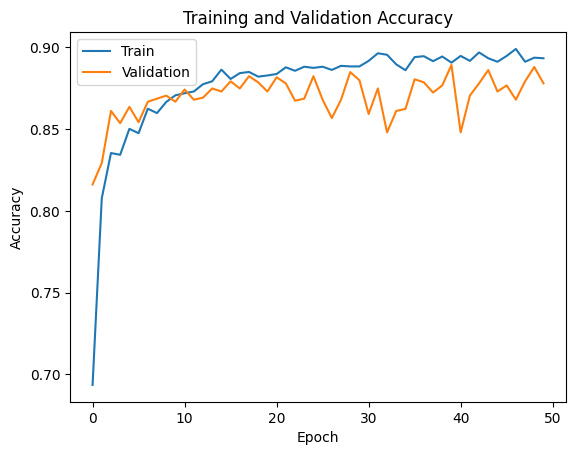

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
max_train_accuracy = max(history.history['accuracy'])
print('Maximum Training Accuracy:', max_train_accuracy)
max_val_accuracy = max(history.history['val_accuracy'])
print('Maximum Validation Accuracy:', max_val_accuracy)

Maximum Training Accuracy: 0.8991251587867737
Maximum Validation Accuracy: 0.889305830001831


## Model Finetuning

In [ ]:
#Fine tuning the entire model

#unfreeze the top layers
base_model.tainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=.00001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"])

from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

history_ft = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = 20,
                    callbacks=[checkpoint])

Epoch 1/20
350/351 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9084
Epoch 1: val_accuracy improved from -inf to 0.88493, saving model to best_model.keras
351/351 [==============================] - 101s 256ms/step - loss: 0.2251 - accuracy: 0.9084 - val_loss: 0.2870 - val_accuracy: 0.8849
Epoch 2/20
350/351 [============================>.] - ETA: 0s - loss: 0.2182 - accuracy: 0.9112
Epoch 2: val_accuracy did not improve from 0.88493
351/351 [==============================] - 82s 232ms/step - loss: 0.2181 - accuracy: 0.9113 - val_loss: 0.2872 - val_accuracy: 0.8843
Epoch 3/20
350/351 [============================>.] - ETA: 0s - loss: 0.2148 - accuracy: 0.9129
Epoch 3: val_accuracy did not improve from 0.88493
351/351 [==============================] - 83s 233ms/step - loss: 0.2148 - accuracy: 0.9129 - val_loss: 0.2872 - val_accuracy: 0.8843
Epoch 4/20
350/351 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9084
Epoch 4: val_accuracy did

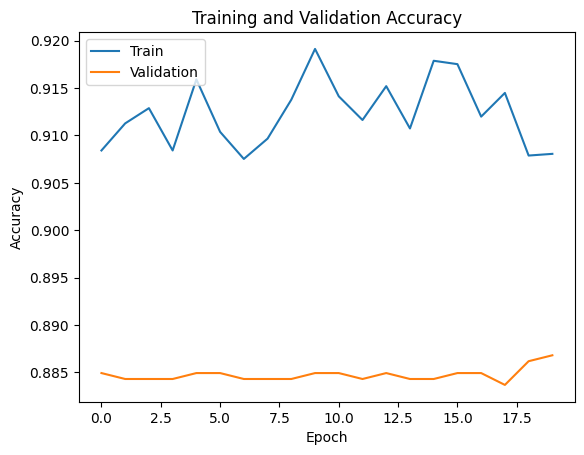

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation metrics
plt.plot(history_ft.history['accuracy'])
plt.plot(history_ft.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Testing for Unseen Data.

In [ ]:
# Load the model with the highest validation accuracy
best_model = tf.keras.models.load_model('best_model.keras')

In [ ]:
!mkdir kvasir-valid
!wget --no-check-certificate 'https://pern-my.sharepoint.com/:u:/g/personal/m21f0034ai010_fecid_paf-iast_edu_pk/EenAReYD4WdPiNrvXXFJdMEBOIgB4xt0GGvGQsPeMDQY5Q?e=QkVU50&download=1' -O kvasir-validation-dataset.zip
!unzip /content/kvasir-validation-dataset.zip
!mv /content/content/kvasir-validation /content/kvasir-valid
!rm -r /content/content

In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/kvasir-valid/kvasir-validation',
    image_size=(299, 299),
    batch_size=16,
    shuffle=False,
)

In [ ]:
# Extract true labels from the directory structure
true_labels = []
for images, labels in validation_dataset:
    true_labels.extend(labels.numpy())

# Convert to numpy array
true_labels = np.array(true_labels)

# Make predictions using the model on the validation dataset
predictions = best_model.predict(validation_dataset)

# Ensure the number of samples matches
num_samples_predictions = len(predictions)
num_samples_true_labels = len(true_labels)

if num_samples_predictions != num_samples_true_labels:
    print(f"Error: Mismatch in the number of samples - Predictions: {num_samples_predictions}, True Labels: {num_samples_true_labels}")
else:
    # Evaluate the model's performance
    from sklearn.metrics import accuracy_score, classification_report

    predicted_labels = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f"\nAccuracy: {accuracy}")

    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

50/50 [==============================] - 13s 195ms/step

Accuracy: 0.8575

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.88      0.84      0.86       100
           2       0.74      0.70      0.72       100
           3       0.88      0.95      0.91       100
           4       0.99      0.98      0.98       100
           5       0.70      0.74      0.72       100
           6       0.88      0.86      0.87       100
           7       0.98      0.94      0.96       100

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



In [21]:
max_train_accuracy = max(history_ft.history['accuracy'])
print('Maximum Training Accuracy:', max_train_accuracy)
max_val_accuracy = max(history_ft.history['val_accuracy'])
print('Maximum Validation Accuracy:', max_val_accuracy)

Maximum Training Accuracy: 0.9191215634346008
Maximum Validation Accuracy: 0.8868042230606079


In [ ]:
print("Training accuracy list:", history.history['accuracy'])
print("Validation accuracy list:", history.history['val_accuracy'])

print("Training accuracy list (finetuned):", history_ft.history['accuracy'])
print("Validation accuracy list (finetuned):", history_ft.history['val_accuracy'])

Training accuracy list: [0.6934475898742676, 0.8077129125595093, 0.8353865146636963, 0.834315299987793, 0.8502053022384644, 0.8475272059440613, 0.8625245690345764, 0.8598464727401733, 0.8666309714317322, 0.8707373738288879, 0.8719871640205383, 0.8730583786964417, 0.8775218725204468, 0.8793072700500488, 0.886448860168457, 0.8807355761528015, 0.8843063712120056, 0.8850205540657043, 0.8821638822555542, 0.8828780651092529, 0.883770763874054, 0.8878771662712097, 0.8857346773147583, 0.8882342576980591, 0.8875200748443604, 0.8882342576980591, 0.88627028465271, 0.8887698650360107, 0.8884127736091614, 0.8884127736091614, 0.8918050527572632, 0.8964470624923706, 0.8955543637275696, 0.8896625638008118, 0.8860917687416077, 0.8941260576248169, 0.8946616649627686, 0.8916264772415161, 0.8944831490516663, 0.8907337784767151, 0.8948401808738708, 0.8918050527572632, 0.8969826698303223, 0.8934118747711182, 0.8912694454193115, 0.8948401808738708, 0.8991251587867737, 0.8912694454193115, 0.8937689661979675, 